# Exploratory Data Analysis on Flight Price Data 

### Introduction :

In this exploratory data analysis project we will insights from Flight Price dataset. We will gain incredible insights from their distribution and classifications.


#### Importing Libraries for Data Analysis and Visualisation :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import warnings
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

    
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-price-prediction-dataset/Data_Train.xlsx
/kaggle/input/flight-price-prediction-dataset/Test_set.xlsx


### Data Preparation :

In [2]:
df = pd.read_excel(r"../input/flight-price-prediction-dataset/Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# Replacing columns with lower case letters

df.columns = df.columns.str.lower()

In [4]:
df.shape

(10683, 11)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [6]:
df.isna().sum()

airline            0
date_of_journey    0
source             0
destination        0
route              1
dep_time           0
arrival_time       0
duration           0
total_stops        1
additional_info    0
price              0
dtype: int64

#### Since there are only 2 missing values , we can exclude them

In [7]:
df.dropna(inplace=True)

In [8]:
df.dtypes

airline            object
date_of_journey    object
source             object
destination        object
route              object
dep_time           object
arrival_time       object
duration           object
total_stops        object
additional_info    object
price               int64
dtype: object

## 1 - Top Carriers by No of Flight :

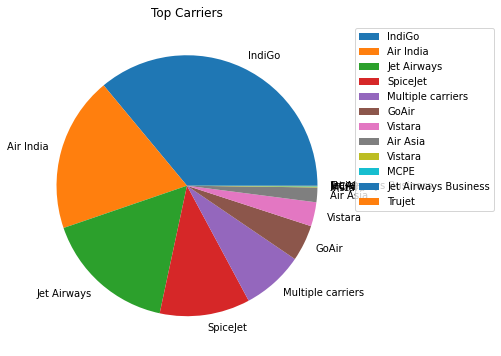

In [9]:
top_carriers = np.array(df['airline'].value_counts(sort=True))

labels = ['IndiGo','Air India','Jet Airways','SpiceJet','Multiple carriers','GoAir','Vistara','Air Asia','Vistara','MCPE','Jet Airways Business','Trujet']

plt.figure(figsize=(8,6))
plt.pie(top_carriers, labels=labels,shadow=False)
plt.legend(labels=labels, 
           bbox_to_anchor=(1,1))
plt.title('Top Carriers')
plt.show()

#### - conclusions :

* Jet Airways Operates the Most no.of Flights,
* Indigo, Air India, Jet Airways, SpiceJet operates major chunk of the flights.

## 2 - Distribution of Ticket Prices : 

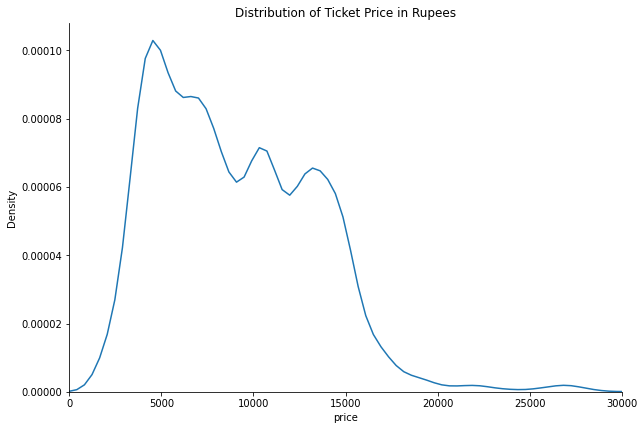

In [10]:
ticket_price = sns.displot(data=df, x='price', kind='kde', legend=True)
plt.title('Distribution of Ticket Price in Rupees')
ticket_price.fig.set_figwidth(10)
ticket_price.fig.set_figheight(6)
ticket_price.set(xlim=(0, 30000))

#### - 

## 3 - Histogram of Ticket Prices : 

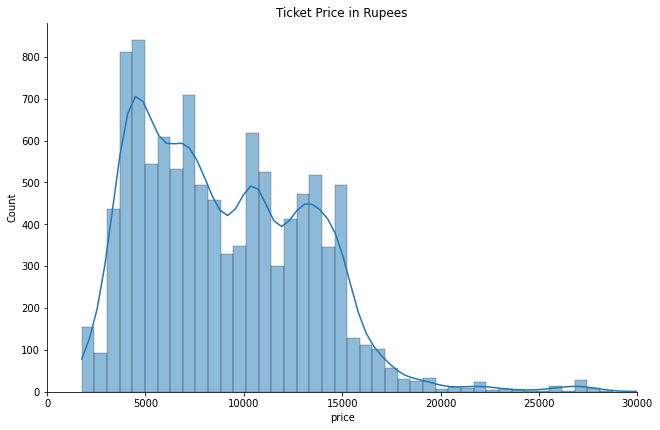

In [11]:
ticket_price = sns.displot(x=df['price'], data=df, kde=True)
plt.title('Ticket Price in Rupees')
ticket_price.fig.set_figwidth(10)
ticket_price.fig.set_figheight(6)
ticket_price.set(xlim=(0, 30000))

#### conclusions :

* Most of the Tickets are priced between 3000 - 15000,
* There are few outliers ranging upto 25k.

## 4- Busiest Air Routes in the DataSet :

In [12]:
busy_routes = df['route'].value_counts().reset_index().set_index('index')
busy_routes = busy_routes.head()
busy_routes

,route
index,
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621


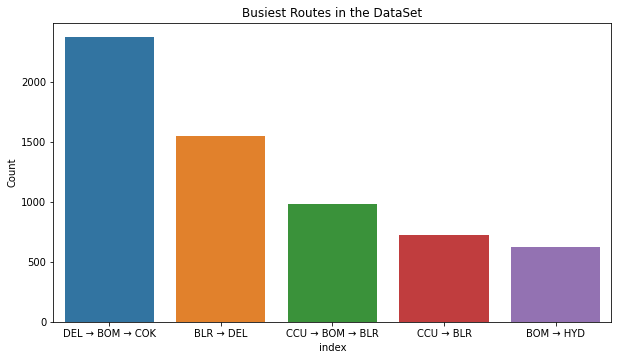

In [13]:
plt.figure(figsize=(10,5.5))
sns.barplot(x=busy_routes.index, y=busy_routes.route)
plt.title('Busiest Routes in the DataSet')
plt.ylabel('Count')
plt.show()

#### conclusions :

* Delhi to Cochin via Mumbai is the Busiest route with 2376 flights,
* Followed by Bangalore to Delhi.

## 5 - Airports with Most no of Departure :

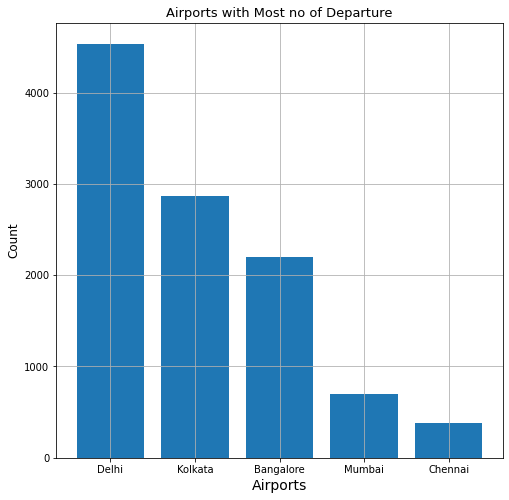

In [14]:
count = df.source.value_counts()
departure = np.array(['Delhi','Kolkata','Bangalore','Mumbai','Chennai'])

fig, ax = plt.subplots()

ax.bar(departure,count)
ax.set_title("Airports with Most no of Departure",fontdict={'size':13})
ax.set_xlabel("Airports",fontdict={'size':14})
ax.set_ylabel("Count",fontdict={'size':12})
ax.grid()

fig.set_size_inches(8,8)
plt.show()

#### conclusions :

Delhi is the Busiest Airport with 4536 flights followed by Kolkata and Bangalore Airports.


## 6 - Frequent Destination :

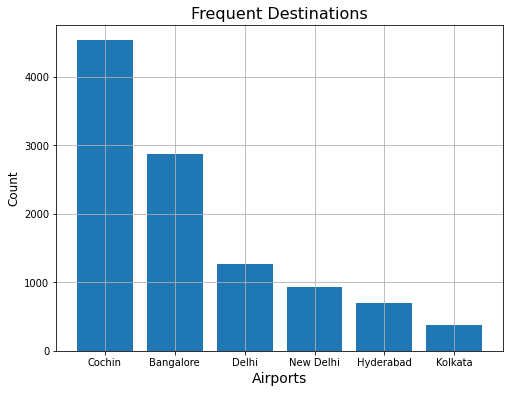

In [15]:
count1 = df.destination.value_counts()
departure = np.array(['Cochin','Bangalore','Delhi','New Delhi','Hyderabad','Kolkata'])

fig, ax = plt.subplots()

ax.bar(departure,count1)
ax.set_title("Frequent Destinations",fontdict={'size':16})
ax.set_xlabel("Airports",fontdict={'size':14})
ax.set_ylabel("Count",fontdict={'size':12})
ax.grid()

fig.set_size_inches(8,6)
plt.show()

#### conclusions :

Delhi is the Busiest Airport with 4536 flights followed by Kolkata and Bangalore Airports.

## 7 - Peak Day of the Month :

In [16]:
df_1 = df.copy()

df_1['date']=df_1['date_of_journey'].str.split('/').str[0]
df_1['month']=df_1['date_of_journey'].str.split('/').str[1]
df_1['year']=df_1['date_of_journey'].str.split('/').str[2]

In [17]:
df_1.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


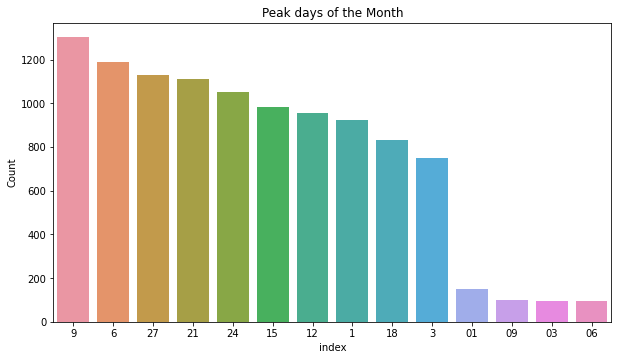

In [18]:
peak_month = df_1['date'].value_counts().reset_index().set_index('index')

plt.figure(figsize=(10,5.5))
sns.barplot(x=peak_month.index, y=peak_month.date)
plt.title('Peak days of the Month')
plt.ylabel('Count')
plt.show()

#### Conclusion :

Day 9 is the Peak day of the Month

## 8 - Tariff on Individual Days :

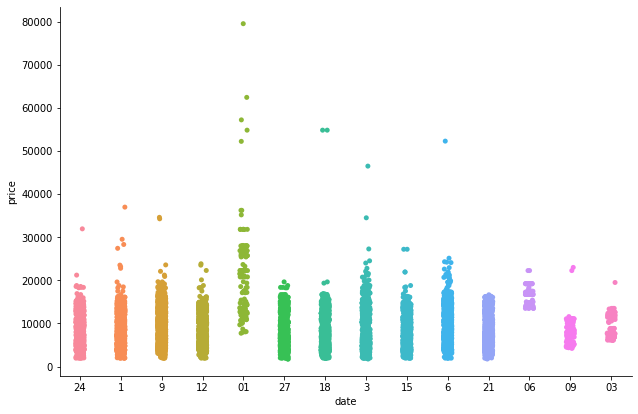

In [19]:
tariff = sns.catplot(x='date', y='price', data=df_1)
tariff.fig.set_figwidth(10)
tariff.fig.set_figheight(6) 

## 9 - Tariff on Individual Days :

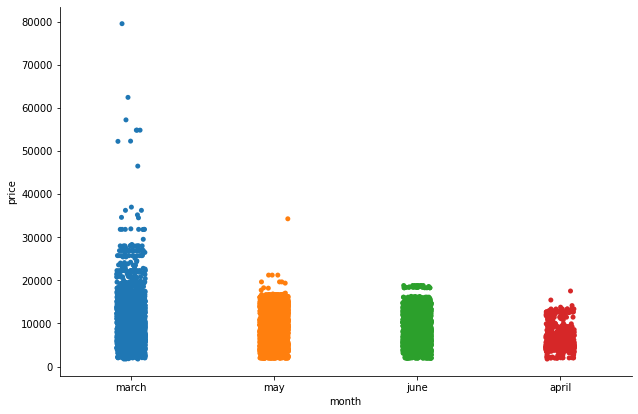

In [20]:
df_1['month']=df_1['month'].map({'03':'march','05':'may','06': 'june','04':'april'})

tariff = sns.catplot(x='month', y='price', data=df_1)
tariff.fig.set_figwidth(10)
tariff.fig.set_figheight(6) 

#### Conclusion :

March has the highest tariffs, while April has the lowest.

In [21]:
#splitting Departure time into hour and min column :

df_1['dept_hour']=df_1['dep_time'].str.split(':').str[0]
df_1['dept_min']=df_1['dep_time'].str.split(':').str[1]

df_1['dept_hour']=df_1['dept_hour'].astype(int)
df_1['dept_min']=df_1['dept_min'].astype(int)


#splitting Arrival time into hour and min column :

df_1['arrival_hour']=df_1['arrival_time'].str.split(':').str[0]
df_1['arrival_min']=df_1['arrival_time'].str.split(':').str[1]

df_1['arrival_hour']=df_1['arrival_hour'].astype(int)
df_1['arrival_min']=df_1['arrival_hour'].astype(int)


In [22]:
df_1.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,date,month,year,dept_hour,dept_min,arrival_hour,arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,march,2019,22,20,1,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,may,2019,5,50,13,13
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,june,2019,9,25,4,4
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,may,2019,18,5,23,23
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,march,2019,16,50,21,21


## 10 - Peak Hour for Departure :

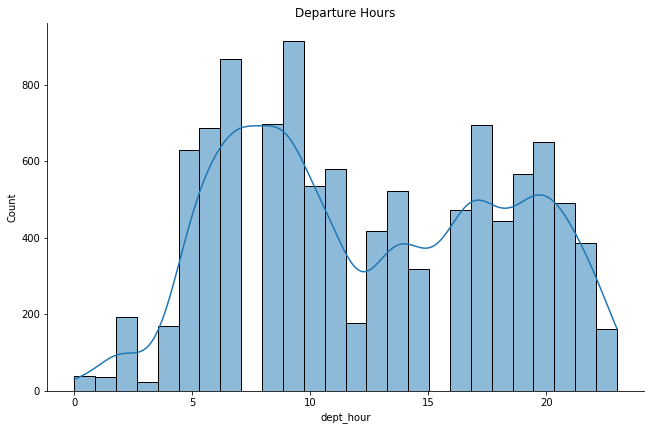

In [23]:
dept_hour = sns.displot(x=df_1['dept_hour'], data=df_1, kde=True)
plt.title('Departure Hours')
dept_hour.fig.set_figwidth(10)
dept_hour.fig.set_figheight(6)

**9am is the peak hour for Departure**

## 11 - Peak Hour for Arrival :¶

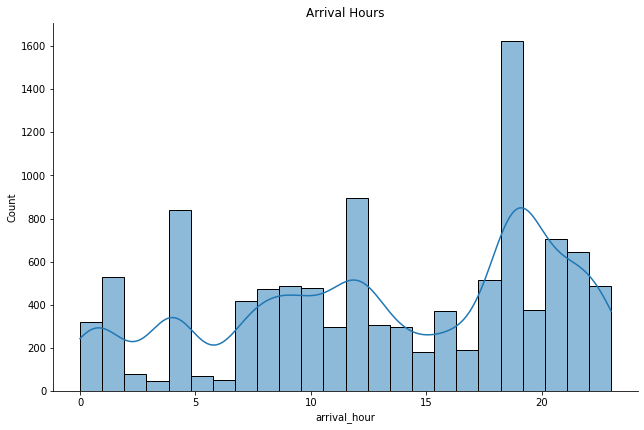

In [24]:
arr_hour = sns.displot(x=df_1['arrival_hour'], data=df_1, kde=True)
plt.title('Arrival Hours')
arr_hour.fig.set_figwidth(10)
arr_hour.fig.set_figheight(6)

**6pm is the peak hour for Arrival**

## 12 - Peak Hour in terms of Tarrif : 

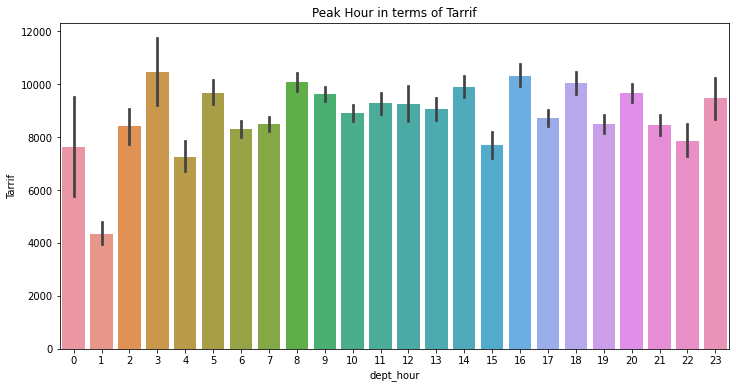

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x=df_1.dept_hour, y=df_1.price)
plt.title('Peak Hour in terms of Tarrif')
plt.ylabel('Tarrif')
plt.show()

## 13 - Pairplotting Cities with other variables :

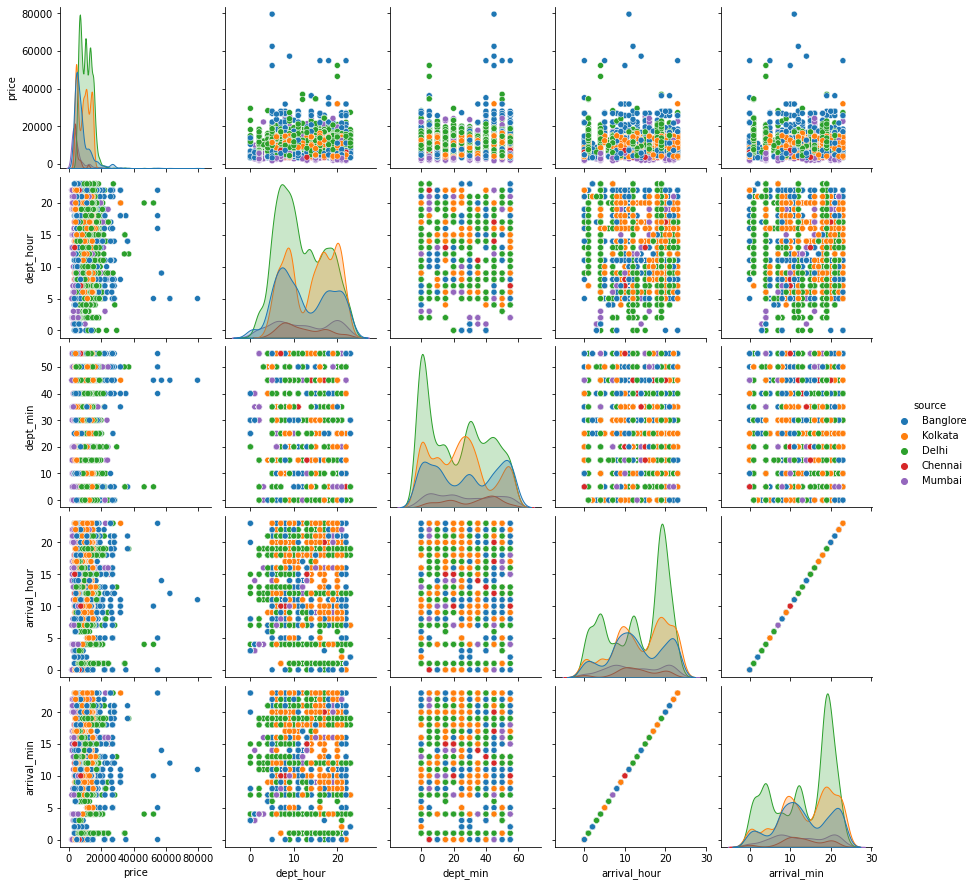

In [26]:
sns.pairplot(df_1,hue = 'source')
plt.show()

### Thank you for taking the time to read this notebook; please upvote and provide feedback.